# Graphiques fixes

Dans cette partie, nous allons apprendre à manipuler `matplotlib` (combiné à `numpy`) pour tracer des graphiques.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'

In [2]:
def UPS_colors(x=0.5):
    """Définition de la palette de couleurs UPS"""
    UPS_primary = (0.9294117647058824, 0.0784313725490196, 0.3568627450980392)
    UPS_secondary = (0., 0.3058823529411765, 0.49019607843137253)
    return tuple(
        [x*c2+(1-x)*c1 for (c1, c2) in zip(UPS_primary, UPS_secondary)]
    )
UPS_color = (0.38823529411764707, 0., 0.23529411764705882)

## La commande `plot`

`matplotlib` est un module qui permet de tracer facilement des nuages de points. Pour tracer une fonction, nous nous contenterons de relier ces points par des traits et de prendre suffisamment de points pour que l'oeil voit une courbe continue.

Pour tracer la courbe $x\mapsto x^2$ entre $0$ et $1$, nous procédons ainsi :

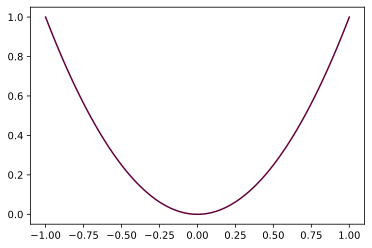

In [3]:
x = np.linspace(-1, 1, 101)       # abscisses des points
y = x*x                           # ordonnées des points

fig = plt.figure()                # création d'un objet figure
ax = fig.add_subplot(1, 1, 1)     # création d'un Axes (calque) dans la figure
ax.plot(x, y, color=UPS_color)    # on trace le nuage de point de coordonnées (x, y)
plt.show()                        # pas nécessaire !

## Une figure complète

On introduit à présent des commandes pour ajouter un titre, une légende...

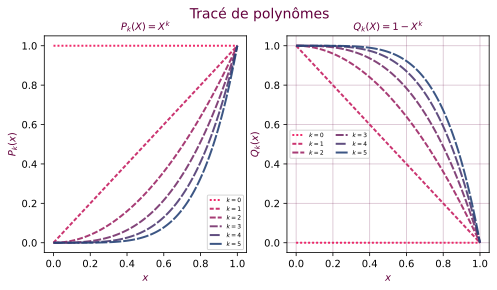

In [4]:
def P(x, k):
    return x**k

def Q(x, k):
    return 1-x**k

def test_plot():
    x = np.linspace(0, 1, 100)
    vect_k = list(range(6))
    fig = plt.figure(figsize=(8, 4))                # une figure de taille (8, 4)
    fig.suptitle(
        'Tracé de polynômes',                       # un titre pour la figure
        fontsize=14,                                # taille du titre
        color=UPS_color                             # couleur du titre
    )
    
    ax_P = fig.add_subplot(1, 2, 1)                 # un axe à gauche
    ax_P.grid(False)                                # ne pas afficher la grille
    for k in vect_k:
        ax_P.plot(     
            x, P(x, k),                             # on affiche P_k
            label=f'$k={k}$',                       # pour mettre une légende
            color=UPS_colors(k/len(vect_k)),        # choix de la couleur rgb
            linewidth=2,                            # épaisseur de ligne
            linestyle=(0, (k+1, 1)),                # style de ligne
            alpha=0.9                               # transparence (entre 0 et 1)
        )
    ax_P.set_title(
        "$P_k(X)=X^k$",                             # titre de l'axe de gauche
        fontsize=10,                                # taille du titre
        color=UPS_color                             # couleur du titre
    )
    ax_P.legend(fontsize=6, ncols=1)                # légende sur 1 colonnes
    ax_P.set_xlabel("$x$", color=UPS_color)         # label axe des abscisses
    ax_P.set_ylabel("$P_k(x)$", color=UPS_color)    # label axe des ordonnées
    
    ax_Q = fig.add_subplot(1, 2, 2)                 # un axe à droite
    ax_Q.grid(True, color=UPS_color, alpha=.25)     # afficher la grille
    for k in vect_k:
        ax_Q.plot(
            x, Q(x, k),                             # on affiche P_k
            label=f'$k={k}$',                       # pour mettre une légende
            color=UPS_colors(k/len(vect_k)),        # choix de la couleur rgb
            linewidth=2,                            # épaisseur de ligne
            linestyle=(0, (k+1, 1)),                # style de ligne
            alpha=0.9                               # transparence (entre 0 et 1)
        )
    ax_Q.set_title(
        "$Q_k(X)=1-X^k$",                           # titre de l'axe de droite
        fontsize=10,                                # taille du titre
        color=UPS_color                             # couleur du titre
    )
    ax_Q.legend(fontsize=6, ncols=2)                # légende sur 2 colonnes
    ax_Q.set_xlabel("$x$", color=UPS_color)         # label axe des abscisses
    ax_Q.set_ylabel("$Q_k(x)$", color=UPS_color)    # label axe des ordonnées
    
test_plot()

:::{admonition} Exercice
:class: admonition-exercice
* Proposez une fonction `plot_trigo` qui trace dans deux sous-figures les fonctions $x\mapsto\cos(kx)$ (dans la première sous-figure) et $x\mapsto\sin(kx)$ (dans la seconde sous-figure) sur l'intervalle $[0, 2\pi]$, pour $k\in[1, 2, 3]$.
* Ajoutez des titres et des légendes ainsi que des labels aux axes.
* Modifiez comme vous voulez l'épaisseur des traits, le style des lignes et les couleurs.
:::

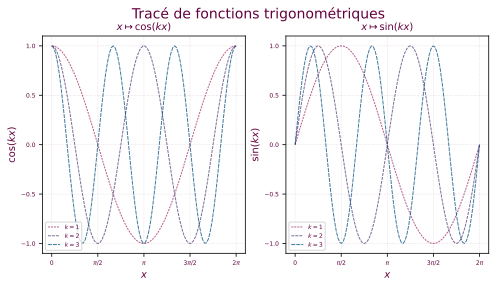

In [5]:
def cosk(x, k):
    return np.cos(k*x)

def sink(x, k):
    return np.sin(k*x)

def test_plot():
    x = np.linspace(0, 2*np.pi, 100)
    vect_k = list(range(1,4))
    fig = plt.figure(figsize=(8, 4))                # une figure de taille (8, 4)
    fig.suptitle(
        'Tracé de fonctions trigonométriques',      # un titre pour la figure
        fontsize=14,                                # taille du titre
        color=UPS_color                             # couleur du titre
    )
    
    lf = [
        {
            'f': cosk,
            'name': '\cos(kx)'
        },
        {
            'f': sink,
            'name': '\sin(kx)'
        },
    ]
    for k in range(2):
        fk = lf[k]['f']
        name = lf[k]['name']
        ax = fig.add_subplot(1, 2, k+1)             # un axe à gauche
        ax.grid(
            True,                                   # afficher la grille
            alpha=.25, color=UPS_color,             # couleur de la grille
            linewidth=.5, linestyle='dotted'        # style des lignes
        )
        for k in vect_k:
            ax.plot(
                x, fk(x, k),                        # on affiche cos(kx)
                label=f'$k={k}$',                   # pour mettre une légende
                color=UPS_colors(k/len(vect_k)),    # choix de la couleur rgb
                linewidth=1,                        # épaisseur de ligne
                linestyle=(0, (k+1, 1)),            # style de ligne
                alpha=0.75                          # transparence (entre 0 et 1)
            )
        ax.set_title(
            f"$x\mapsto{name}$",                    # titre de l'axe de gauche
            fontsize=10,                            # taille du titre
            color=UPS_color                         # couleur du titre
        )
        ax.legend(
            fontsize=6, ncols=1, loc='lower left',
            labelcolor=UPS_color,
        )                                           # légende sur 1 colonnes
        ax.set_xlabel("$x$", color=UPS_color)       # label axe des abscisses
        ax.set_ylabel(f"${name}$", color=UPS_color) # label axe des ordonnées
        ax.set_xticks(
            [k*np.pi/2 for k in range(5)],          # abscisses des ticks
            ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'],
            minor=False
        )
        ax.set_yticks([k/2 for k in range(-2, 3)])  # ordonnées des ticks
        ax.tick_params(
            labelsize=6, labelcolor=UPS_color
        )
test_plot()

## La commande `scatter`

La commande `scatter` permet de placer des marqueurs (des points) sans les relier par des lignes. Cela permet de représenter des nuages de points.

Exécutez la cellule suivante pour l'exemple.

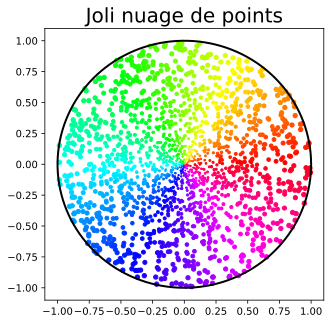

In [6]:
nb_points = 2000                              # nombre de points
theta = 2*np.pi*np.random.rand(nb_points)     # angle theta
r = np.random.rand(nb_points)                 # distance à l'origine r
x, y = r*np.cos(theta), r*np.sin(theta)       # x = r cos(theta), y = r sin(theta)
tt = np.linspace(0, 2*np.pi, 1000)            # abscisse curviligne pour le cercle

fig = plt.figure(figsize=(5, 5))              # ouverture d'une figure
ax = fig.add_subplot(1, 1, 1)                 # création d'un axe
ax.scatter(
    x, y,                                     # abscisse et ordonnées des points
    marker='o',                               # choix du marqueur
    c=theta,                                  # couleur paramétrée par l'angle
    s=20*r,                                   # taille paramétré par r
    cmap='hsv', alpha=1                       # carte de couleur
)
ax.plot(np.cos(tt), np.sin(tt), color='black', linewidth=2)  # ajout du cercle en noir
ax.set_title("Joli nuage de points", fontsize=20)            # titre
plt.show()

## Exercice

Nous allons à présent, sur un exemple, illustrer différentes commandes.

La méthode des rectangles est une méthode de calcul approché d'intégrales. Vous devez la connaître puisqu'elle est utilisée pour définir les intégrales de Riemann pour les fonctions régulières. Dans cet exemple, nous avons considéré la fonction $x\mapsto 1/2+x-2x^2$.

:::{admonition} Exercice
:class: admonition-exercice
* Définissez une figure `fig` de taille $(8, 8)$. Cette figure sera découpée en $2x2$ sous-figures à l'aide de la commande `add_subplot(2, 2, k)` où `k` est le numéro de la sous-figure entre 1 et 4.
* Dans la première sous-figure, tracez la fonction ainsi que l'aire sous la courbe à l'aide de la fonction `plot_exact`.
* En vous inspirant de la fonction `plot_exact`, complétez la fonction `plot_rect` afin que :
  - elle trace également la fonction $f$
  - elle remplisse des rectangles définis par les sommets $(x_k, 0)$, $(x_k, f(x_k))$, $(x_{k+1}, f(x_k))$ et $(x_{k+1}, 0)$ pour $0\leq k\leq N-1$, avec $x_k=a+k(b-a)/N$, $0\leq k\leq N$.
* Dans les sous-figures 2, 3 et 4, ajoutez le tracé obtenu par la fonction `plot_rect` en prenant $N\in\{3, 8, 20\}$.
* (bonus) *ajoutez en rouge dans la fonction `plot_rect` la ligne brisée qui délimite l'aire approchée par la méthode des rectangles.*
:::

:::{admonition} Indication
:class: toggle admonition-indication
Vous pourrez penser à utiliser les commandes `fill_between` qui permet de colorier une zone délimitée par deux courbes et `axhline` permettant de tracer une ligne horizontale.
:::

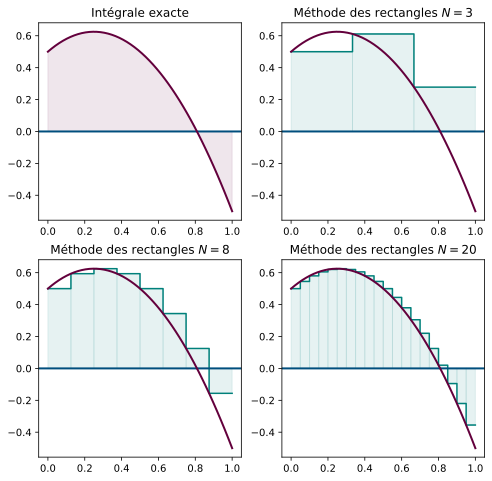

In [7]:
def f(x):
    """La fonction dont on veut calculer l'intégrale (aire sous la courbe)"""
    return .5 + x -2*x**2

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)

def plot_exact(ax, a, b):
    """
    Trace la fonction ainsi que l'aire sous la courbe
    
    Parameters
    ----------
    
    ax: matplotlib axes
        le calque où la figure doit être tracée
        
    a: double
        borne inférieure du tracé
    
    b: double
        borne supérieure du tracé
    """
    xx = np.linspace(a, b)
    ax.axhline(c=UPS_bleu, lw=2)
    ax.plot(xx, f(xx), lw=2, c=UPS_primary)
    ax.fill_between(xx, f(xx), color=UPS_primary, alpha=0.1)
    ax.set_title("Intégrale exacte")
    
def plot_rect(ax, N, a, b):
    """
    Trace la fonction ainsi que l'aire sous la courbe
    approchée par la méthode des rectangles à gauche
    avec N points
    
    Parameters
    ----------
    
    ax: matplotlib axes
        le calque où la figure doit être tracée
        
    N: int
        nombre de points pour la méthode des rectangles
        
    a: double
        borne inférieure du tracé
    
    b: double
        borne supérieure du tracé
    """
    xx = np.linspace(a, b)
    for k in range(N):
        xl = a + k*(b-a)/N
        xr = a + (k+1)*(b-a)/N        
        ax.fill_between(
            [xl, xr],
            [f(xl), f(xl)],
            color=UPS_vert, alpha=0.1
        )
    xrect = np.repeat(np.linspace(a, b, N+1), 2)
    yrect = f(xrect)
    ax.plot(xrect[1:-1], yrect[:-2], color=UPS_vert)
    ax.axhline(c=UPS_bleu, lw=2)
    ax.plot(xx, f(xx), lw=2, c=UPS_primary)
    ax.set_title(f"Méthode des rectangles $N={N}$")
    
a, b = 0, 1
fig = plt.figure(figsize=(8, 8))
plot_exact(fig.add_subplot(2, 2, 1), a, b)
for k, N in enumerate([3, 8, 20]):
    plot_rect(fig.add_subplot(2, 2, k+2), N, 0, 1)